# SRTP project analysis Group 9 (Western Himalayas)

Data obtained from the ISC catalogue at http://www.isc.ac.uk/iscbulletin/search/catalogue/ for the Western Himalayan Region for the years 1980 to 2020 and for min magnitude $M_b$ = 0.1 to max magnitude $M_b$ = 10, where $M_b$ is the Body wave magnitude of the earthquake and for min. depth of 0 to max. depth of 6731 $\approx$ Radius of earth or $R_e$.

In [1]:
import pandas as pd 
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('seaborn-pastel')

import geopandas as gpd
from descartes import PolygonPatch
from matplotlib.animation import FuncAnimation
# from matplotlib.patches import Polygon

In [3]:
df = pd.read_csv('WesternHimalayas_data.csv')

In [4]:
df.head()

,year,month,date,Time,latitude,longitude,depth,magnitude,DATE
0,1980,1,7,12:45:21,33.1280,76.0491,28.0,4.7,1980-01-07
1,1980,1,8,21:58:07,36.7218,78.6252,35.0,4.6,1980-01-08
2,1980,2,13,22:09:34,36.3867,76.8273,92.9,6.1,1980-02-13
3,1980,2,14,3:49:36,36.3603,76.9476,83.7,4.9,1980-02-14
4,1980,3,29,2:02:57,32.7528,73.9396,35.0,4.8,1980-03-29


In [5]:
df.describe()

,year,month,date,latitude,longitude,depth,magnitude
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,2005.567490,7.225926,15.230453,34.729099,75.607291,26.920165,3.981687
std,8.724464,3.599607,8.537206,1.255370,1.848174,25.305840,0.478124
min,1980.000000,1.000000,1.000000,31.493700,73.270400,0.000000,2.200000
25%,2002.000000,4.000000,8.000000,34.089475,73.741075,10.000000,3.700000
50%,2005.000000,8.000000,14.000000,34.824500,75.567250,22.000000,3.900000
75%,2012.000000,10.000000,22.000000,35.596525,77.144825,35.000000,4.200000
max,2020.000000,12.000000,31.000000,37.009000,79.708300,395.400000,6.900000


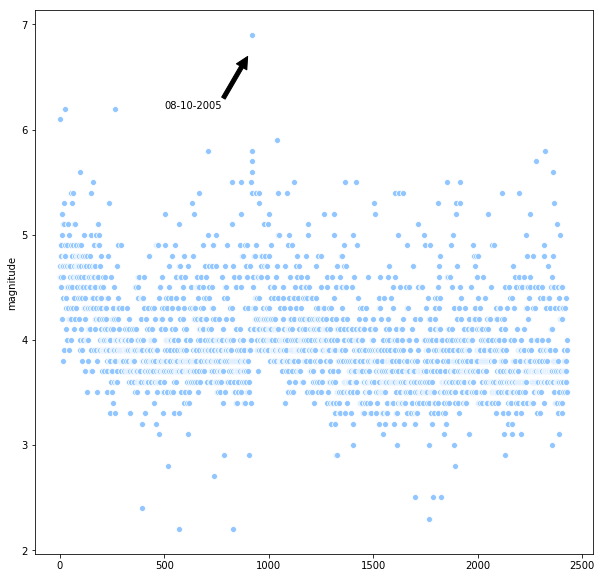

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(y="magnitude", x=df.magnitude.index , data=df)
plt.annotate('08-10-2005', xy=(900, 6.7), xytext=(500, 6.2),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.savefig('overall_earthquakes_himalayas.png')

In [31]:
#group by magnitude counts
df_magnitude_count = pd.DataFrame(df.magnitude.groupby(df.magnitude).count())
df_magnitude_count['index'] = df_magnitude_count.index
df_magnitude_count.columns = ["Count","Magnitude"]

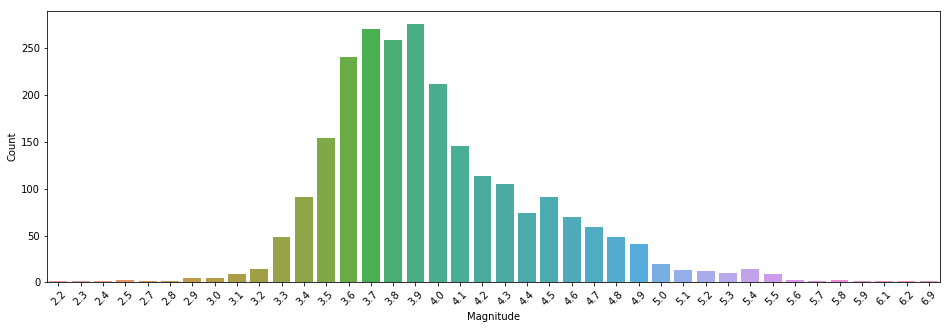

In [32]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x="Magnitude", y="Count", data=df_magnitude_count)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig('magnitude_count_himalayas.png')

## Earthquake Magnitude classes

In [33]:
scale = []
for magnitude in df.magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        scale.append("Limited Damage")
    elif magnitude >=4.0 and magnitude <=4.9:
        scale.append("Minor Damage")
    elif magnitude >=5.0 and magnitude <=5.9:
        scale.append("Slight Damage")
    elif magnitude >=6.0 and magnitude <=6.9:
        scale.append("Severe Damage")
    elif magnitude >=7.0 and magnitude <=7.9:
        scale.append("Serious Damage")
    else:
        scale.append("Great Damage")

In [34]:
df['scale'] = scale

In [35]:
df_damage_count = pd.DataFrame(df.scale.groupby(df.scale).count().sort_values(ascending=False))
df_damage_count['percent'] = ((df_damage_count.scale)/sum(df_damage_count.scale))*100

Text(0.5, 0, 'Magnitude class')

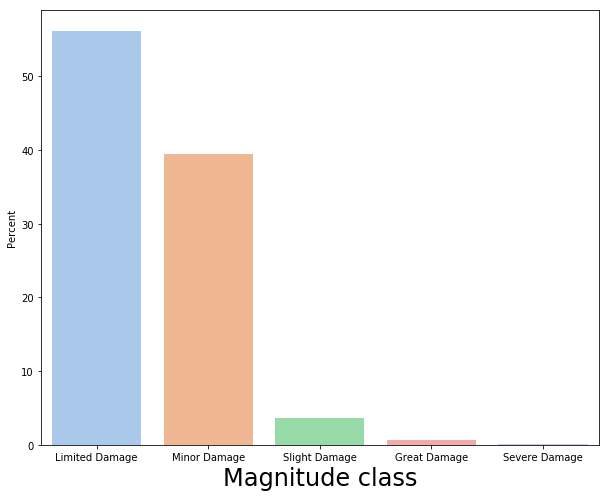

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(df_damage_count.index,df_damage_count.percent, palette="pastel")
# plt.xticks(df_damage_count.index, rotation= 10)
plt.ylabel('Percent')
plt.xlabel('Magnitude class', fontsize=24)

**Magnitude class size: "Great", "Major", "Strong", "Moderate", "Light", "Minor", "Less than 3.9")**

In [37]:
#array for storing the size_class
size_class = []

for magnitude in df.magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        size_class.append("Minor")
    elif magnitude >=4.0 and magnitude <=4.9:
        size_class.append("Light")
    elif magnitude >=5.0 and magnitude <=5.9:
        size_class.append("Moderate")
    elif magnitude >=6.0 and magnitude <=6.9:
        size_class.append("Strong")
    elif magnitude >=7.0 and magnitude <=7.9:
        size_class.append("Major")
    else:
        size_class.append("Great")

#Creating a column in the datafram called class_size
df['size_class'] = size_class

In [38]:
df_size_class = pd.DataFrame(df.size_class.groupby(df.size_class).count())
df_size_class['percent'] = ((df_size_class.size_class)/sum(df_size_class.size_class))*100

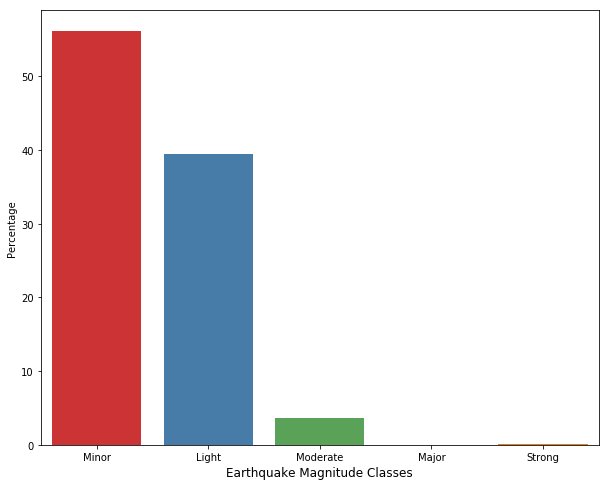

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(df_size_class.index,df_size_class.percent, palette="Set1", order = ['Minor','Light','Moderate',
                                                                                     'Major',
                                                                                    'Strong'])
plt.ylabel('Percentage')
plt.xlabel('Earthquake Magnitude Classes', fontsize=12)
plt.savefig('magnitude_classes_himalayas.png')

In [40]:
mag_class = []
for magnitude in df.magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        mag_class.append("3-3.9")
    elif magnitude >=4.0 and magnitude <=4.9:
        mag_class.append("4-4.9")
    elif magnitude >=5.0 and magnitude <=5.9:
        mag_class.append("5-5.9")
    elif magnitude >=6.0 and magnitude <=6.9:
        mag_class.append("6-6.9")
    elif magnitude >=7.0 and magnitude <=7.9:
        mag_class.append("7-7.9")
    else:
        mag_class.append("Above 8")
df['mag_class'] = mag_class

In [41]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
group_by_year = pd.DataFrame(df.magnitude.groupby([df['DATE'].dt.year]).count())
group_by_year.columns = ['Frequency']

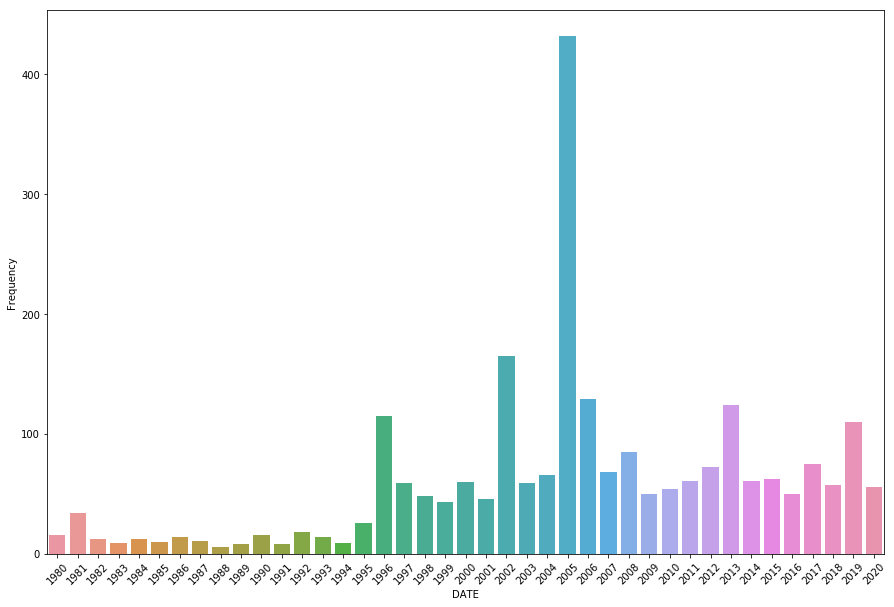

In [42]:
plt.figure(figsize=(15,10))
by_year = sns.barplot(x=group_by_year.index, y=group_by_year.Frequency)
by_year.set_xticklabels(by_year.get_xticklabels(),rotation=45)
plt.savefig('yearly_eq_himalayas.png')

In [43]:
df.head()

,year,month,date,Time,latitude,longitude,depth,magnitude,DATE,scale,size_class,mag_class
0,1980,1,7,12:45:21,33.1280,76.0491,28.0,4.7,1980-01-07,Minor Damage,Light,4-4.9
1,1980,1,8,21:58:07,36.7218,78.6252,35.0,4.6,1980-01-08,Minor Damage,Light,4-4.9
2,1980,2,13,22:09:34,36.3867,76.8273,92.9,6.1,1980-02-13,Severe Damage,Strong,6-6.9
3,1980,2,14,3:49:36,36.3603,76.9476,83.7,4.9,1980-02-14,Minor Damage,Light,4-4.9
4,1980,3,29,2:02:57,32.7528,73.9396,35.0,4.8,1980-03-29,Minor Damage,Light,4-4.9


In [44]:
df.drop(['DATE', 'scale','size_class', 'mag_class'],axis=1,inplace=True)
df.head()

,year,month,date,Time,latitude,longitude,depth,magnitude
0,1980,1,7,12:45:21,33.1280,76.0491,28.0,4.7
1,1980,1,8,21:58:07,36.7218,78.6252,35.0,4.6
2,1980,2,13,22:09:34,36.3867,76.8273,92.9,6.1
3,1980,2,14,3:49:36,36.3603,76.9476,83.7,4.9
4,1980,3,29,2:02:57,32.7528,73.9396,35.0,4.8


In [45]:
df.to_csv(r'Himalayas.csv', index = False)